In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline # to display Matplotlib plots directly within the notebook interface.

In [4]:
Boston = pd.read_csv('boston.csv')
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
Boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='RM', ylabel='MEDV'>

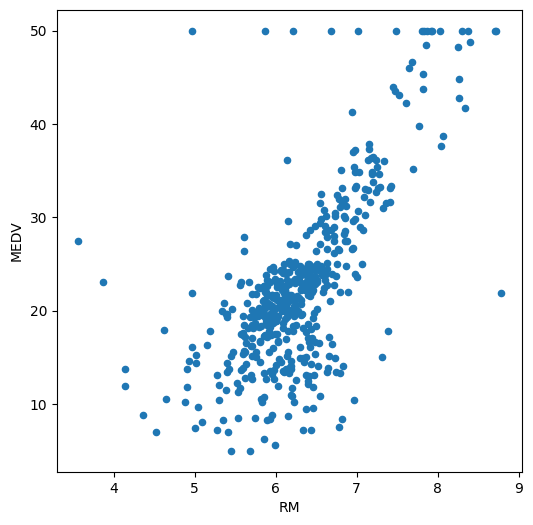

In [8]:
Boston.plot.scatter('RM', 'MEDV', figsize = (6,6))

# In the above plot we can clearly see a linear pattern. The more the average number of rooms per dwelling, the more expensive the median value is.


<Axes: >

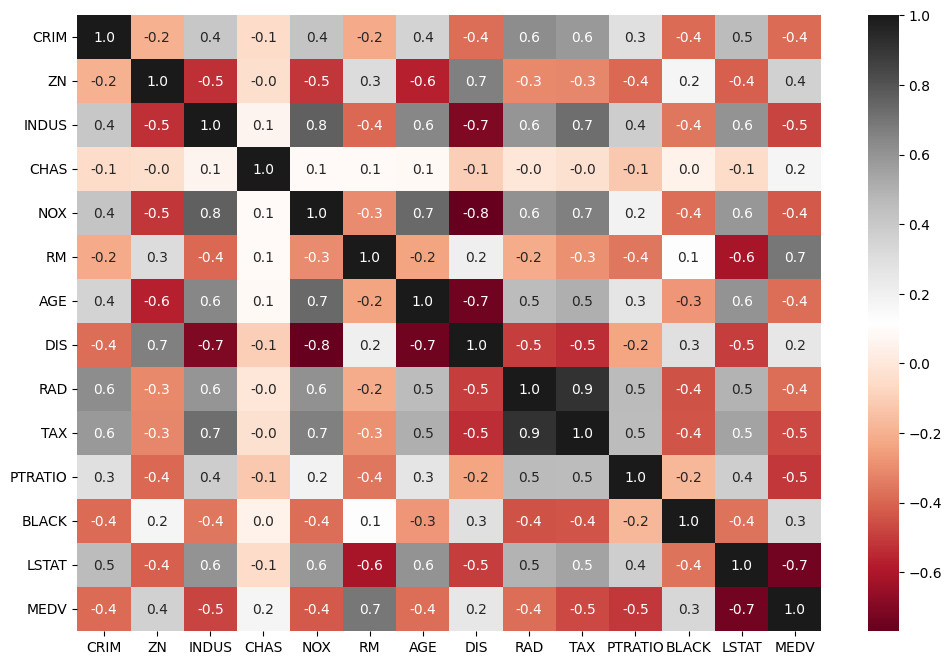

In [10]:
plt.subplots(figsize=(12,8))
sns.heatmap(Boston.corr(), cmap = 'RdGy', annot = True, fmt = '.1f')

# At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus at the last line, where y = MEDV:

When shades of Red/Orange: the more red the color is on X axis, smaller the MEDV, its negative correlation

When light colors: those variables at axis x and y, they dont have any relation, its zero correlation

When shades of Gray/BLACK : the more BLACK the color is on X axis, more higher the value med is, its Positive correlation

# Training Linear Regression Model

Define X & Y

X = variables named as predictors, independent variables & features

Y = variable named as response or dependent variable 

In [12]:
X = Boston[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX']]
Y = Boston['MEDV']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)


In [32]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (404, 10), Y: (404,)
Test Dataset Size - X: (102, 10), Y: (102,)


In [33]:
# Model Building 

lm = LinearRegression()
lm.fit(X_train, Y_train)
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Test vs Predicted')

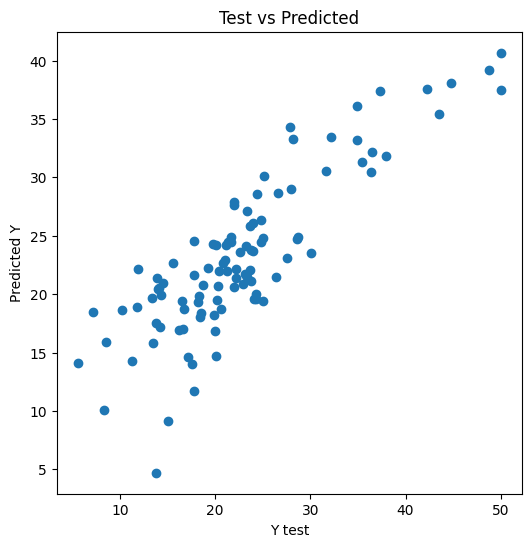

In [34]:
plt.figure(figsize = (6,6))
plt.scatter(Y_test, predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')
plt.title('Test vs Predicted')

Text(0.5, 1.0, 'Regression Line Tracing')

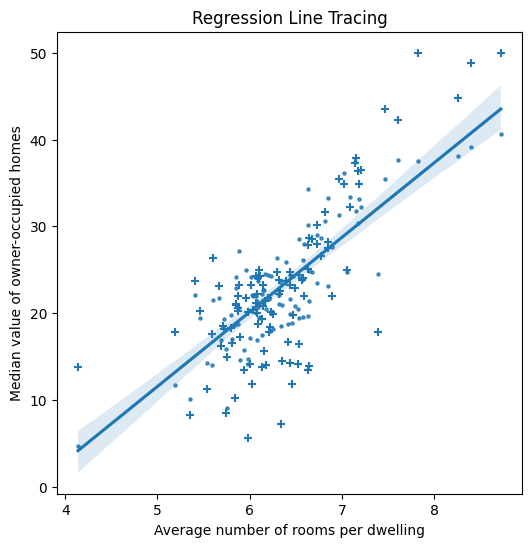

In [35]:
plt.figure(figsize=(6, 6))
sns.regplot(x = X_test['RM'], y = predictions, scatter_kws={'s':5})
plt.scatter(X_test['RM'], Y_test, marker = '+')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes')
plt.title('Regression Line Tracing')


In [36]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))


Mean Absolute Error: 3.777327057530938
Mean Square Error: 22.00439342547579
Root Mean Square Error: 4.690884077173064


In [37]:
# Now, lets print the coefficients
coefficients = pd.DataFrame(lm.coef_.round(2), X.columns)
coefficients.columns = ['Coefficients']
print(coefficients)

       Coefficients
CRIM          -0.19
ZN             0.08
INDUS         -0.10
CHAS           4.77
NOX          -12.58
RM             6.39
AGE           -0.06
DIS           -1.82
RAD            0.18
TAX           -0.01


In [38]:
lm.score(X_test, Y_test)

0.7206600744439882

Regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It is commonly used for predicting continuous outcomes. 

Linear regression is a specific type of regression analysis where the relationship between the independent variables and the dependent variable is modeled as a linear equation. It assumes that there is a linear relationship between the independent variables and the dependent variable

RMSE is a measure of the differences between predicted values and observed values. It is the square root of the average of the squared differences between predicted and observed values. RMSE is commonly used to evaluate the accuracy of regression models. 

MAE is another measure of the differences between predicted values and observed values. It is the average of the absolute differences between predicted and observed values. MAE is less sensitive to outliers compared to RMSE. 

MSE is a measure of the average squared differences between predicted values and observed values. It is similar to RMSE but without taking the square root. MSE is commonly used in regression analysis as a loss function to be minimized.

# Column Names 

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of non-retail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitrogen oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted mean of distances to five Boston employment centres.

RAD: index of accessibility to radial highways.

TAX: full-value property-TAX rate per $10,000.

PTRATIO:pupil-teacher ratio by town

BLACK: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT: lower status of the population (percent).

MEDV: median value of owner-occupied homes in $$1000s